<a href="https://colab.research.google.com/github/lyeslehara1996/Colab/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#declaration des module 

import pandas as pd 
import re 
import nltk
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler
import numpy as np

from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string 
SAVE_FILE = False

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split



In [ ]:
#affichage de data frame 

df=pd.read_excel('/content/SemEval2017.xlsx')
df.head()

In [76]:
df.drop("Unnamed: 3", axis=1, inplace=True)
df.drop("Unnamed: 4", axis=1, inplace=True)
df.drop("Unnamed: 5", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)
df.drop("Unnamed: 7", axis=1, inplace=True)
df.drop("Unnamed: 8", axis=1, inplace=True)
df.drop("Unnamed: 9", axis=1, inplace=True)
df.drop("Unnamed: 10", axis=1, inplace=True)
df.drop("Unnamed: 11", axis=1, inplace=True)
df.drop("Unnamed: 12", axis=1, inplace=True)
df.drop("Unnamed: 13", axis=1, inplace=True)
df.drop("Unnamed: 14", axis=1, inplace=True)
df.drop("Unnamed: 15", axis=1, inplace=True)

In [77]:
df.head()

,id,polariy,Comments
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195044992,negative,If these runway renovations at the airport pre...
3,619974445185302016,neutral,If you could ask an onstage interview question...
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...


In [78]:
df.polariy.value_counts()

neutral     10342
positive     7059
negative     3231
Name: polariy, dtype: int64

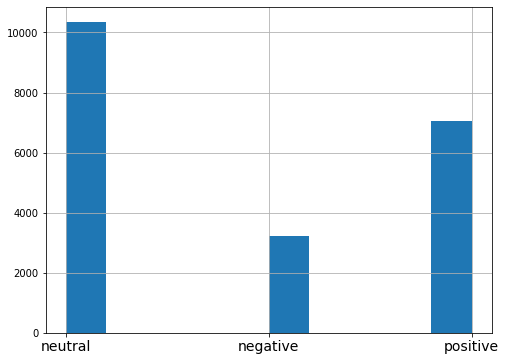

In [79]:
plt.figure(figsize=(8,6))
df.polariy.hist(xlabelsize=14)
plt.show()

In [80]:
df_clean = df
df_clean.Comments=df_clean.Comments.str.lower()
df_clean.head()

,id,polariy,Comments
0,619950566786113024,neutral,"picturehouse's, pink floyd's, 'roger waters: t..."
1,619969366986235008,neutral,order go set a watchman in store or through ou...
2,619971047195044992,negative,if these runway renovations at the airport pre...
3,619974445185302016,neutral,if you could ask an onstage interview question...
4,619987808317406976,positive,a portion of book sales from our harper lee/go...


In [81]:
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'https?:\/\/\S+', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'{link}', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'&[a-z]+;', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r"[^a-z]", ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'@mention', ' ', x))
df_clean.Comments = df_clean.Comments.apply(lambda x: " ".join(x.lower() for x in str(x).split()  if len(x)>2 ))
df_clean

,id,polariy,Comments
0,619950566786113024,neutral,picturehouse pink floyd roger waters the walll...
1,619969366986235008,neutral,order set watchman store through our website b...
2,619971047195044992,negative,these runway renovations the airport prevent f...
3,619974445185302016,neutral,you could ask onstage interview question miss ...
4,619987808317406976,positive,portion book sales from our harper lee set wat...
...,...,...,...
20628,681877834982232064,neutral,shaquillehoneal from what think you asking ord...
20629,681879579129200000,positive,iran ranks liver surgeries allah bless the cou...
20630,681883903259357056,neutral,hours before arrived saudi arabia tuesday turk...
20631,681904976860327040,negative,vanityfair alex kim kardashian worth how love ...


In [82]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
df_clean['Clean_Comment'] = df_clean['Comments'].apply(tknzr.tokenize)
df_clean.head()

,id,polariy,Comments,Clean_Comment
0,619950566786113024,neutral,picturehouse pink floyd roger waters the walll...,"[picturehouse, pink, floyd, roger, waters, the..."
1,619969366986235008,neutral,order set watchman store through our website b...,"[order, set, watchman, store, through, our, we..."
2,619971047195044992,negative,these runway renovations the airport prevent f...,"[these, runway, renovations, the, airport, pre..."
3,619974445185302016,neutral,you could ask onstage interview question miss ...,"[you, could, ask, onstage, interview, question..."
4,619987808317406976,positive,portion book sales from our harper lee set wat...,"[portion, book, sales, from, our, harper, lee,..."


In [83]:
if SAVE_FILE:
    df_clean.to_excel('/content/savedData.xlsx', index=False)

In [84]:
data=pd.read_excel('/content/savedData.xlsx')


In [85]:
data

,id,polariy,Comments,Clean_Comment
0,619950566786113024,neutral,picturehouse pink floyd roger waters the walll...,"['picturehouse', 'pink', 'floyd', 'roger', 'wa..."
1,619969366986235008,neutral,order set watchman store through our website b...,"['order', 'set', 'watchman', 'store', 'through..."
2,619971047195044992,negative,these runway renovations the airport prevent f...,"['these', 'runway', 'renovations', 'the', 'air..."
3,619974445185302016,neutral,you could ask onstage interview question miss ...,"['you', 'could', 'ask', 'onstage', 'interview'..."
4,619987808317406976,positive,portion book sales from our harper lee set wat...,"['portion', 'book', 'sales', 'from', 'our', 'h..."
...,...,...,...,...
20628,681877834982232064,neutral,shaquillehoneal from what think you asking ord...,"['shaquillehoneal', 'from', 'what', 'think', '..."
20629,681879579129200000,positive,iran ranks liver surgeries allah bless the cou...,"['iran', 'ranks', 'liver', 'surgeries', 'allah..."
20630,681883903259357056,neutral,hours before arrived saudi arabia tuesday turk...,"['hours', 'before', 'arrived', 'saudi', 'arabi..."
20631,681904976860327040,negative,vanityfair alex kim kardashian worth how love ...,"['vanityfair', 'alex', 'kim', 'kardashian', 'w..."


In [86]:
data =  df_clean[['Clean_Comment', 'polariy']]
data.head()

,Clean_Comment,polariy
0,"[picturehouse, pink, floyd, roger, waters, the...",neutral
1,"[order, set, watchman, store, through, our, we...",neutral
2,"[these, runway, renovations, the, airport, pre...",negative
3,"[you, could, ask, onstage, interview, question...",neutral
4,"[portion, book, sales, from, our, harper, lee,...",positive


In [87]:
data.shape

(20633, 2)

In [88]:
#convertir au chiffre pour avoir implementer le model 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [96]:
max_word = 200000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Clean_Comment'].values)
X = tokenizer.texts_to_sequences(data['Clean_Comment'].values)
X = pad_sequences(X)
X[:2]

array([[    0,     0,     0,     0,     0,     0,     0,     0, 11101,
         1575,   296,  2895,  7659,     1, 11102,   843,   404,    38,
          538,  6013,    89,     1,  1093,   367,   372,   291],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   782,   147,   416,  1125,   324,    92,  1769,
          161,   101,     2,    31,   467,   165,  4309, 11103]],
      dtype=int32)

In [97]:
X.shape[0]

20633

In [98]:
Y = pd.get_dummies(data['polariy']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(16506, 26) (16506, 3)
(4127, 26) (4127, 3)


In [99]:
#reshap data on dim=3

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
Y_train=np.reshape(Y_train,(Y_train.shape[0],Y_train.shape[1],1))
Y_test=np.reshape(Y_test,(Y_test.shape[0],Y_test.shape[1],1))
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(16506, 26, 1) (16506, 3, 1)
(4127, 26, 1) (4127, 3, 1)


In [100]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_word, embed_dim,input_length = X.shape[0]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20633, 128)        25600000  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 20633, 128)        0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 394       
Total params: 25,855,194
Trainable params: 25,855,194
Non-trainable params: 0
_________________________________________________________________
None


In [101]:

batch_size = 128
model.fit(X_train, Y_train, epochs = 15)

Epoch 1/15


ValueError: ignored